# Logistic Regresssion Group Case Study       
   Vamsi Krishna Kancharla, Savita Singh

## Lead Scoring Case Study
### Problem Statement :

An education company named X Education which sells online courses to industry professionals is facing challenges with respect to its lead conversion. 

The company markets its courses on several websites and search engines like Google etc. Many professionals who are interested in these courses and fill up the form providing their email address or phone number are considered as leads. The employees from the sales team will follow up with these leads and convert them to paying customers. This lead conversion process in X Education is very low with only 30% of total leads are getting converted.

The CEO of the company has set an ambitious target of having lead conversion rate to be around 80%. As the data analysts for X Education, we are supposed to help the sales team through following pointers :

    1. To help the sales team in identifying the most promising leads i.e. i.e. the leads that are most likely            to convert into paying customers (hot leads)
    2. To build a model wherein we need to assign a lead score to each of the leads such that the customers with          higher lead score have a higher conversion chance and the customers with lower lead score have a lower              conversion chance.

Based on above problem statement, we can conclude this is a categorical classification problem and we can use Logistic Regression Model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads (hot leads).

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Read Data - To load data from Leads.csv
leadscore = pd.read_csv("/Users/vamsi/Desktop/Upgrad/Logistic Regression/LeadScoringCaseStudy_Assignment/Leads.csv")

In [4]:
# Inspect Data - To display top 5 rows in data frame
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Analyze the various aspects of the leadscore dataframe

In [5]:
# Inspect dataframe's columns, shapes, variable types etc.
print(leadscore.shape)
print(leadscore.columns)
print(leadscore.dtypes)

(9240, 37)
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [6]:
# Inspect statistical aspects of the dataframe
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Inspect each column type
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
# Check for any duplicate records in the dataframe -- Prospect ID
sum(leadscore.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
# Check for any duplicate records in the dataframe  -- Lead Number
sum(leadscore.duplicated(subset = 'Lead Number')) == 0

True

There are no duplicate records in the dataframe, i.e. Prospect ID & Lead Number are unique id columns which don't have any impact on the model and can be ignored while creating the model

### Understanding of Data frame - Data Cleansing

We can see lot of nulls in the data frame, also we can see some columns contain "select" as value. This we need to handle first

#### Handling Select Values in Dataframe

There are some columns in dataset which have a value - 'Select'. This is due to default option is select and as it is not mandatory, the lead may not chose them and leave it as is

In [10]:
# To find select value in the columns
leadscore.isin(['Select']).any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

We can see "Select" value in Specialization, How did you hear about X Education, Lead Profile, City columns in the dataframe.

In [11]:
# Handling of "Select" in Specialization column
leadscore['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We can see that there are 1942 records with Select in "Specialization" column and we are not sure to choose a specific value for this "Select" value. So we are going a head with replacing this with Nan

In [12]:
# To replace "Select" with Nan
leadscore['Specialization'].replace('Select', np.nan, inplace = True)

In [13]:
# Handling of "Select" in How did you hear about X Education column
leadscore['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

We can see that there are 5043 records with Select in "How did you hear about X Education" column and we are not sure to choose a specific value for this "Select" value. So we are going a head with replacing this with Nan

In [14]:
# To replace "Select" with Nan
leadscore['How did you hear about X Education'].replace('Select',np.nan, inplace = True)

In [15]:
# Handling of "Select" in Lead Profile column
leadscore['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We can see that there are 4146 records with Select in "Lead Profile" column and we are not sure to choose a specific value for this "Select" value. So we are going a head with replacing this with Nan

In [16]:
# To replace "Select" with Nan
leadscore['Lead Profile'].replace('Select', np.nan, inplace = True)

In [17]:
# Handling of "Select" in City column
leadscore['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can see that there are 2249 records with Select in "City" column and we are not sure to choose a specific value for this "Select" value. So we are going a head with replacing this with Nan

In [18]:
# To replace "Select" with Nan
leadscore['City'].replace('Select', np.nan, inplace = True)

In [19]:
# To see the dataframe after handling selects
leadscore.isin(['Select']).any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

##### We can see that no column contains "Select" value in the dataframe

### Analyze missing values in the dataframe

In [20]:
#To find the percentage of missing values in each columns in dataframe
round(100*(leadscore.isnull().sum())/(len(leadscore)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see a lot of missing data in some of the columns in the dataframe. We are taking the cutoff as 45% and dropping off those columns which are having more than 45% of the missing data.

In [21]:
#To drop columns having 45% of missing data
leadscore.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis = 1, inplace = True)

In [22]:
#To find the percentage of missing values in each columns in dataframe - after dropping
round(100*(leadscore.isnull().sum())/(len(leadscore)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Analyze skewed data in the dataframe - For categorical variables
For this first we are creating a dataframe with all categorical variables and then we will check the value counts for each column

In [23]:
# Create a dataframe with all categorical variables
category_var_df = leadscore[['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted','Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content','City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]
category_var_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,Email Opened,India,NaN,Unemployed,Better Career Prospects,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,Email Opened,India,Business Administration,Student,Better Career Prospects,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [24]:
# Check the value counts for each categorical variable
for col in category_var_df:
    print (category_var_df[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

Email Opened                    3437
SMS Sent            

Based on above value count analysis, we can see that all the below columns are most skewed columns. All these columns are having more than 90% of the data with one value. So the model will not learn any new from these columns. So we will drop all these columns. 

'Do Not Call', 'Country','What matters most to you in choosing a course' 'Search', 'Magazine',
'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses''Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'

Lets analyze each column before dropping them

### Explodatory Data Analysis (EDA)

### Categorical Column Analysis - Handling missing Values, Univariate & Bivariate Analysis

In [25]:
# Lead Origin column analysis
leadscore['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

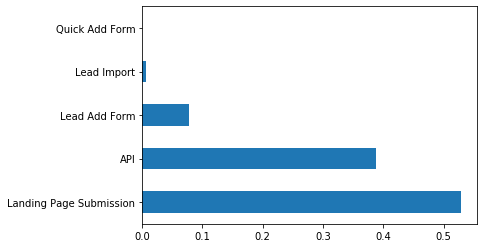

In [26]:
# plot to visualize the data for - Lead Origin column -- Univariate Analysis
leadscore['Lead Origin'].value_counts(normalize = True).plot.barh()
plt.show()

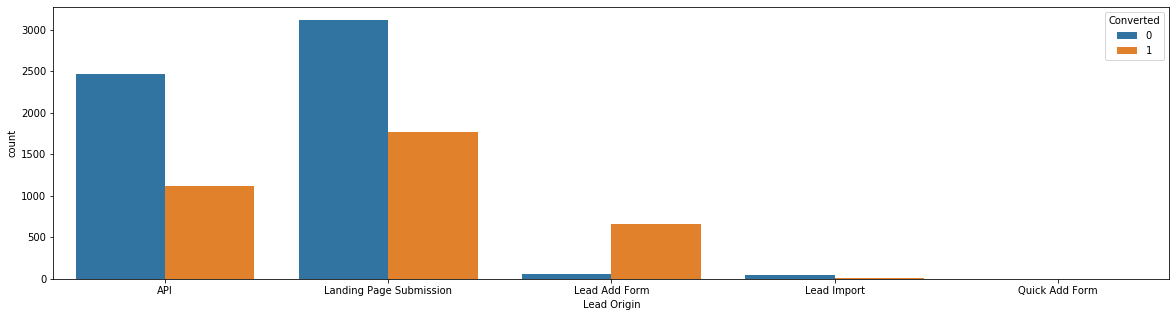

In [27]:
# plot to visualize the data for - Lead Origin Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leadscore)
plt.show()

We can see that API & Landing Page Submission bring huge leads and also had decent conversion, Lead Add Form which has few leads but has huge conversion

In [28]:
# Lead Source column analysis
leadscore['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

We can see 36 Nan values and also lot of records with very low frequency. Also we can see that google and Google with different categories. So we combine all these low frequency records to Others

In [29]:
# Datacleaning for Lead Source 
leadscore['Lead Source'] = leadscore['Lead Source'].replace('google','Google')
leadscore['Lead Source'] = leadscore['Lead Source'].replace(np.nan,'Others')
leadscore['Lead Source'] = leadscore['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','Pay per Click Ads','testone','blog','WeLearn','NC_EDM','welearnblog_Home','youtubechannel'],'Others')

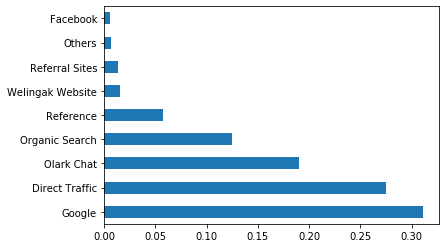

In [30]:
# plot to visualize the data for - Lead Source column -- Univariate Analysis
leadscore['Lead Source'].value_counts(normalize = True).plot.barh()
plt.show()

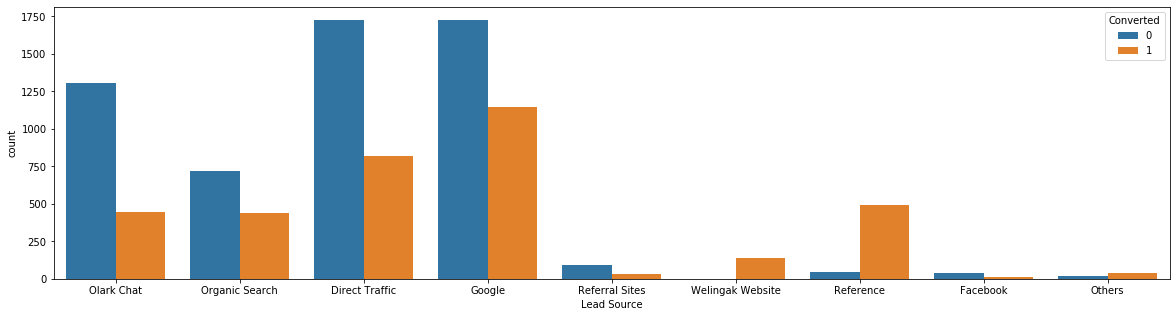

In [31]:
# plot to visualize the data for - Lead Source Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leadscore)
plt.show()

We can see that maximum leads are generated by direct traffic and google and also we can infer that reference has excellent lead conversion

In [32]:
# Do Not Email column analysis
leadscore['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

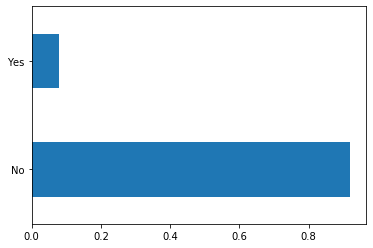

In [33]:
# plot to visualize the data for - Do Not Email column  -- Univariate Analysis
leadscore['Do Not Email'].value_counts(normalize = True).plot.barh()
plt.show()

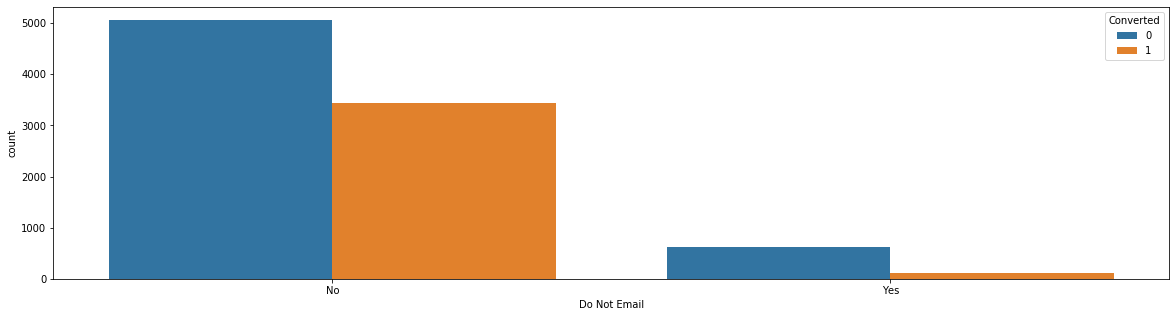

In [34]:
# plot to visualize the data for - Do Not Email Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leadscore)
plt.show()

We can see that No corresponds to huge record count and also had good conversion

In [35]:
# Do Not Call column analysis
leadscore['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

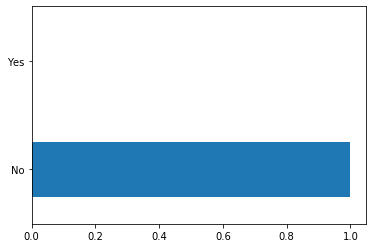

In [36]:
# plot to visualize the data for - Do Not Call column  -- Univariate Analysis
leadscore['Do Not Call'].value_counts(normalize = True).plot.barh()
plt.show()

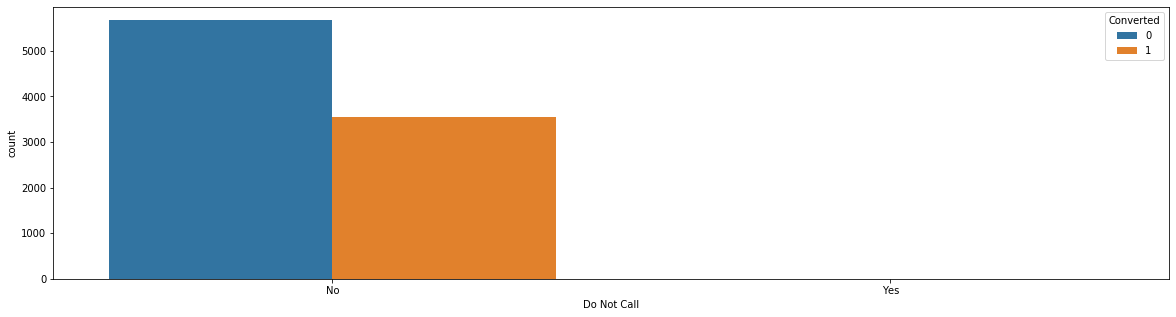

In [37]:
# plot to visualize the data for - Do Not Call Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leadscore)
plt.show()

Almost all data is having No, we will drop this column

In [38]:
# Last Activity column analysis
leadscore['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

We have 103 NaN values and few values with very less records. We will combine all these to Others. Any records less than 100 count we will consider to others

In [39]:
# Datacleaning for Last Activity
leadscore['Last Activity'] = leadscore['Last Activity'].replace(np.nan, 'Others')
leadscore['Last Activity'] = leadscore['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

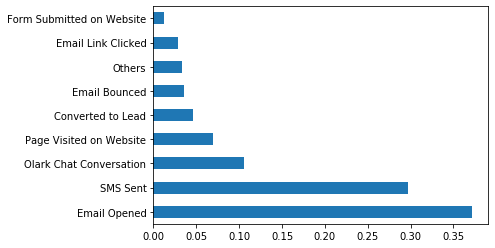

In [40]:
# plot to visualize the data for - Last Activity column  -- Univariate Analysis
leadscore['Last Activity'].value_counts(normalize = True).plot.barh()
plt.show()

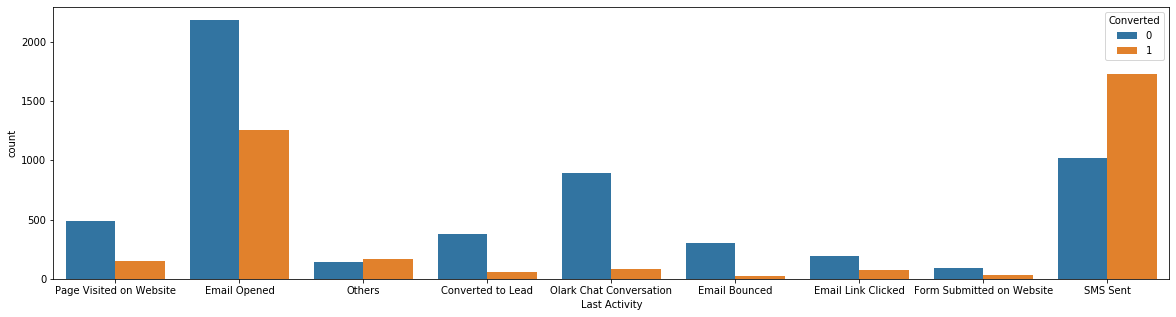

In [41]:
# plot to visualize the data for - Last Activity Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leadscore)
plt.show()

We can see Email Opened and SMS Sent correspond to high leads but SMS sent has huge lead conversion

In [42]:
# Country column analysis
leadscore['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Netherlands                2
Uganda                     2
Italy                      2
Belgium                    2
Ghana                      2
China                      2
Bangladesh                 2
Philippines                2
Asia/Pacific Region        2
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Switzerland                1
Russia                     1
Kenya         

We can see 2400+ records with NaN and India is most frequent value, so we update these Nan records with India

In [43]:
# Datacleaning for Country
leadscore['Country'] = leadscore['Country'].replace(np.nan, 'India')

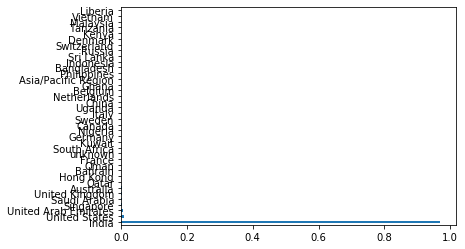

In [44]:
# plot to visualize the data for - Country column -- Univariate Analysis
leadscore['Country'].value_counts(normalize = True).plot.barh()
plt.show()

We can see 95% of data corresponds to only India, as this column is skewed we will drop this column

In [45]:
# Specialization column analysis
leadscore['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We can see 3380+ records with NaN for Specialization column. As these don't have any specific value, we will go ahead with Not specified for these. 

In [46]:
# Datacleaning for Specialization 
leadscore['Specialization'] = leadscore['Specialization'].replace(np.nan,'Not Specified')

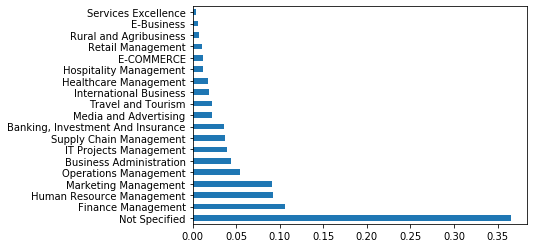

In [47]:
# plot to visualize the data for - Specialization column -- Univariate Analysis
leadscore['Specialization'].value_counts(normalize = True).plot.barh()
plt.show()

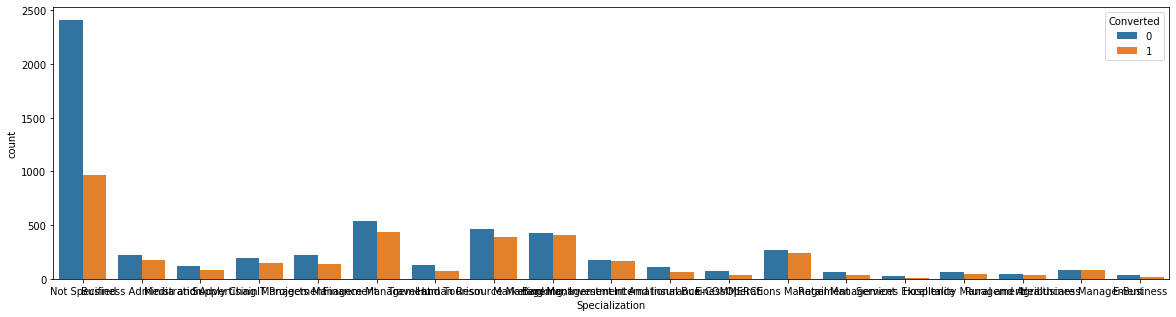

In [48]:
# plot to visualize the data for - Specialization Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leadscore)
plt.show()

In [49]:
# What is your current occupation column analysis
leadscore['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We can see 2690 records with NaN and as most frequent column is Unemployed we will impute the Null data with it

In [50]:
# Datacleaning for What is your current occupation 
leadscore['What is your current occupation'] = leadscore['What is your current occupation'].replace(np.nan,'Unemployed')

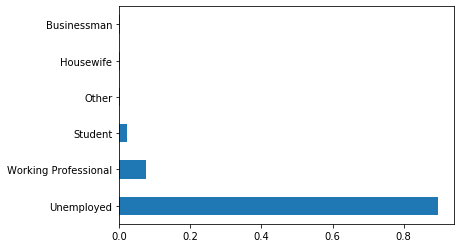

In [51]:
# plot to visualize the data for - What is your current occupation column  -- Univariate Analysis
leadscore['What is your current occupation'].value_counts(normalize = True).plot.barh()
plt.show()

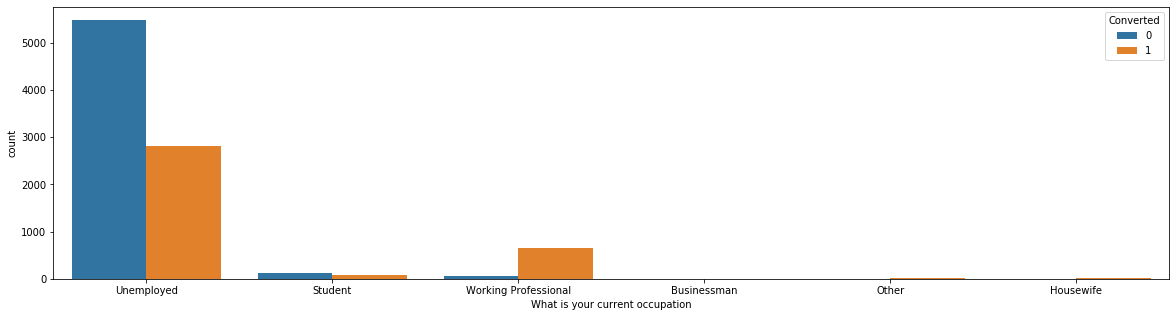

In [52]:
# plot to visualize the data for - What is your current occupation Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leadscore)
plt.show()

We can see Unemployed corresponds to most leads but working professional corresponds to more conversions

In [53]:
# What matters most to you in choosing a course column analysis
leadscore['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We have 2700+ records with NaN and as Better Career Prospects is most frequenct column, we can impute it

In [54]:
# Datacleaning for What matters most to you in choosing a course 
leadscore['What matters most to you in choosing a course'] = leadscore['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

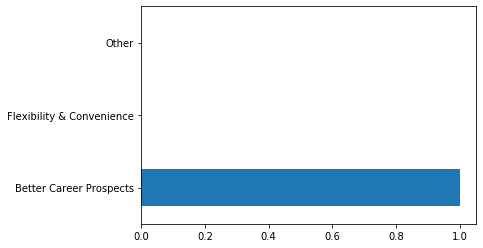

In [55]:
# plot to visualize the data for - What matters most to you in choosing a course column  -- Univariate Analysis
leadscore['What matters most to you in choosing a course'].value_counts(normalize = True).plot.barh()
plt.show()

Better Career Prospects correponds most of the data, as this column is skewed we will drop this

In [56]:
# Search column analysis
leadscore['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

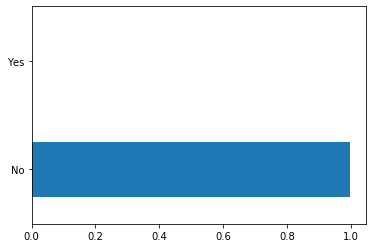

In [57]:
# plot to visualize the data for - Search column -- Univariate Analysis
leadscore['Search'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [58]:
# Magazine column analysis
leadscore['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

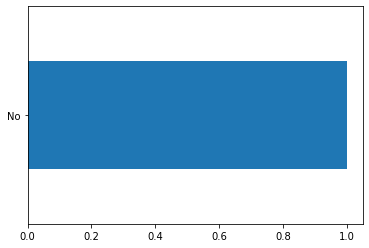

In [59]:
# plot to visualize the data for - Magazine column -- Univariate Analysis
leadscore['Magazine'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds all the data, as this column is skewed we will drop this

In [60]:
# Newspaper Article column analysis
leadscore['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

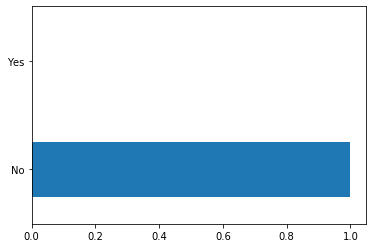

In [61]:
# plot to visualize the data for - Newspaper Article column -- Univariate Analysis
leadscore['Newspaper Article'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [62]:
# X Education Forums column analysis
leadscore['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

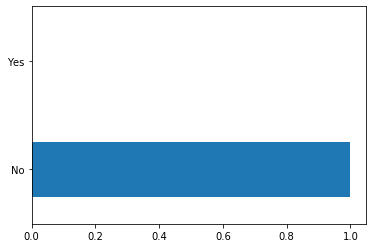

In [63]:
# plot to visualize the data for - X Education Forums column -- Univariate Analysis
leadscore['X Education Forums'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [64]:
# Newspaper column analysis
leadscore['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

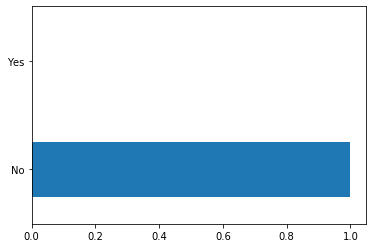

In [65]:
# plot to visualize the data for - Newspaper column -- Univariate Analysis
leadscore['Newspaper'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [66]:
# Digital Advertisement column analysis
leadscore['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

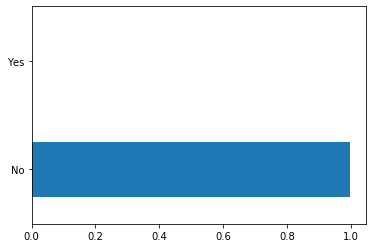

In [67]:
# plot to visualize the data for - Digital Advertisement column -- Univariate Analysis
leadscore['Digital Advertisement'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [68]:
# Through Recommendations column analysis
leadscore['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

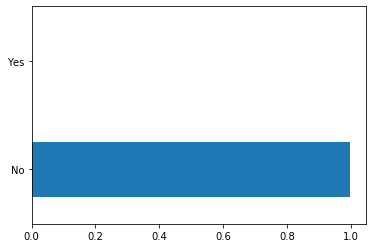

In [69]:
# plot to visualize the data for - Through Recommendations column -- Univariate Analysis
leadscore['Through Recommendations'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds most of the data, as this column is skewed we will drop this

In [70]:
# Receive More Updates About Our Courses column analysis
leadscore['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

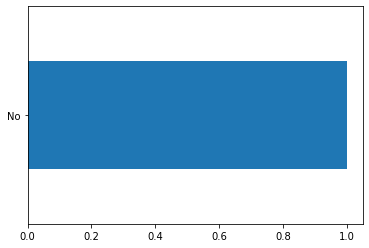

In [71]:
# plot to visualize the data for - Receive More Updates About Our Courses column -- Univariate Analysis
leadscore['Receive More Updates About Our Courses'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds all of the data, as this column is skewed we will drop this

In [72]:
# Tags column analysis
leadscore['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

As we have 3353 records with NaN, and these are not specified, we will replace this "Not Specified"

Also as we have lot of levels in the Tags, we will consolidate all the low frequency tags under "Other Tags".  We take the cut off as less than 100

In [73]:
# Datacleaning for Tags 
leadscore['Tags'] = leadscore['Tags'].replace(np.nan,'Not Specified')
leadscore['Tags'] = leadscore['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other Tags')

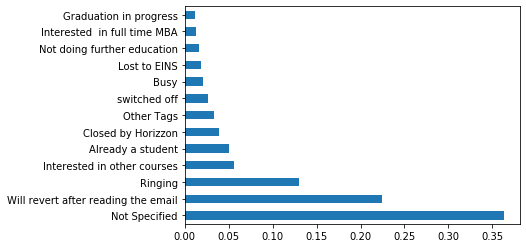

In [74]:
# plot to visualize the data for - Tags column -- Univariate Analysis
leadscore['Tags'].value_counts(normalize = True).plot.barh()
plt.show()

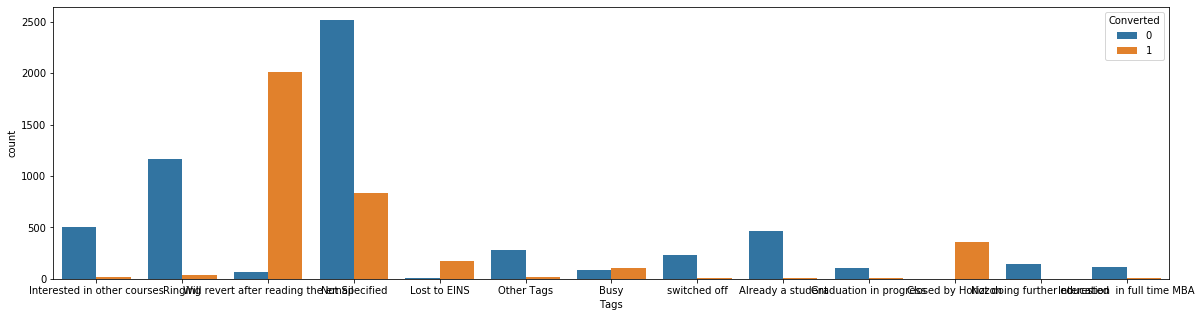

In [75]:
# plot to visualize the data for - Tags Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Tags', hue = 'Converted', data = leadscore)
plt.show()

We can see Will revert after reading the email has huge conversion when compared to others

In [76]:
# Update me on Supply Chain Content column analysis
leadscore['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

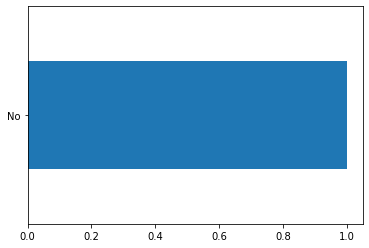

In [77]:
# plot to visualize the data for - Update me on Supply Chain Content column -- Univariate Analysis
leadscore['Update me on Supply Chain Content'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds all of the data, as this column is skewed we will drop this

In [78]:
# 'Get updates on DM Content' column analysis
leadscore['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

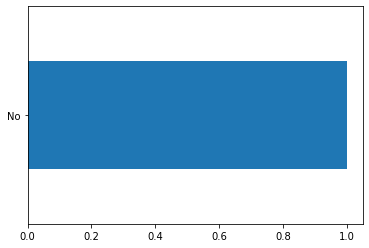

In [79]:
# plot to visualize the data for - Get updates on DM Content column -- Univariate Analysis
leadscore['Get updates on DM Content'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds all of the data, as this column is skewed we will drop this

In [80]:
# City column analysis
leadscore['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can see 3600+ records have NaN and as Mumbai corresonds to most of the data, we will impute Mumbai with NaN

In [81]:
# Datacleaning for City 
leadscore['City'] = leadscore['City'].replace(np.nan,'Mumbai')

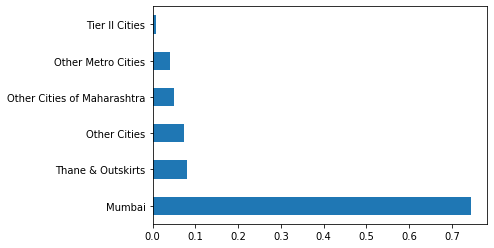

In [82]:
# plot to visualize the data for - City column -- Univariate Analysis
leadscore['City'].value_counts(normalize = True).plot.barh()
plt.show()

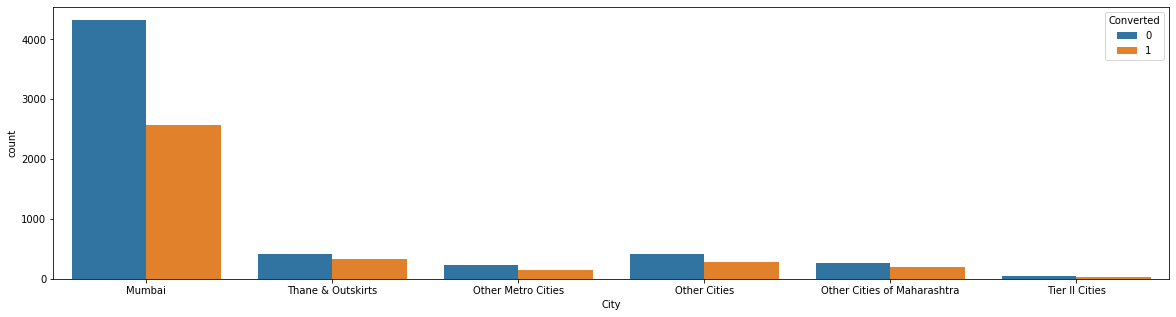

In [83]:
# plot to visualize the data for - City Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'City', hue = 'Converted', data = leadscore)
plt.show()

We can see Mumbai corresponds to most leads and conversions

In [84]:
# I agree to pay the amount through cheque column analysis
leadscore['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

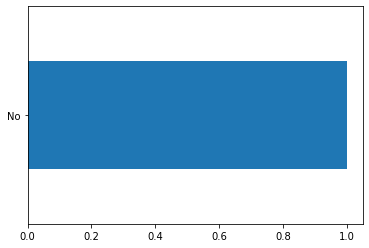

In [85]:
# plot to visualize the data for - I agree to pay the amount through cheque column -- Univariate Analysis
leadscore['I agree to pay the amount through cheque'].value_counts(normalize = True).plot.barh()
plt.show()

No correponds all of the data, as this column is skewed we will drop this

In [86]:
# A free copy of Mastering The Interview column analysis
leadscore['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

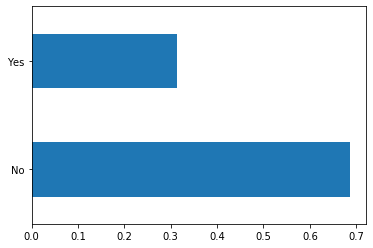

In [87]:
# plot to visualize the data for - A free copy of Mastering The Interview column -- Univariate Analysis
leadscore['A free copy of Mastering The Interview'].value_counts(normalize = True).plot.barh()
plt.show()

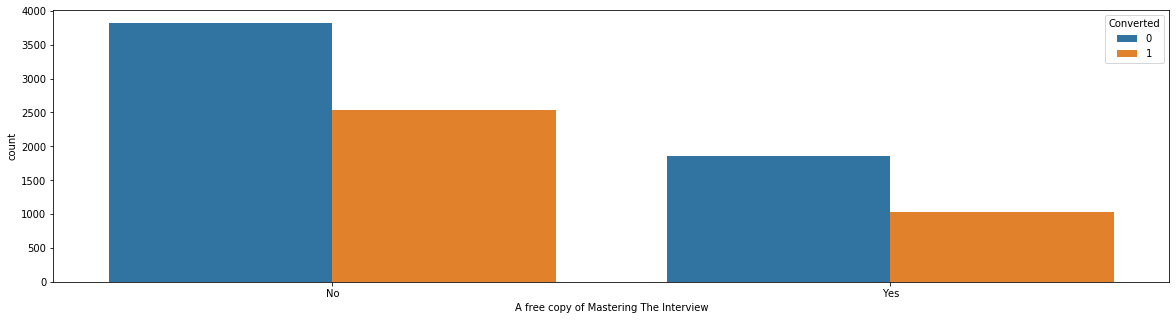

In [88]:
# plot to visualize the data for - A free copy of Mastering The Interview Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = leadscore)
plt.show()

We can see both Yes/No correspnds to good conversions for this column

In [89]:
# Last Notable Activity column analysis
leadscore['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

We can see lot of less frequency columns, we can consolidate all these under Other Notable Activity. We will take cut off as 100

In [90]:
# Datacleaning for Last Notable Activity 
leadscore['Last Notable Activity'] = leadscore['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Email Received','View in browser link Clicked','Resubscribed to emails','Form Submitted on Website'],'Other Notable Activity')

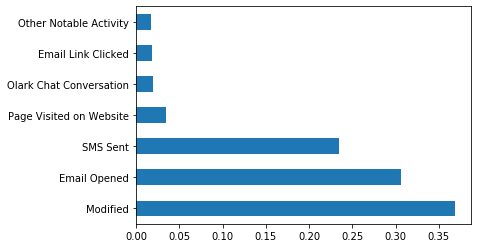

In [91]:
# plot to visualize the data for - Last Notable Activity column -- Univariate Analysis
leadscore['Last Notable Activity'].value_counts(normalize = True).plot.barh()
plt.show()

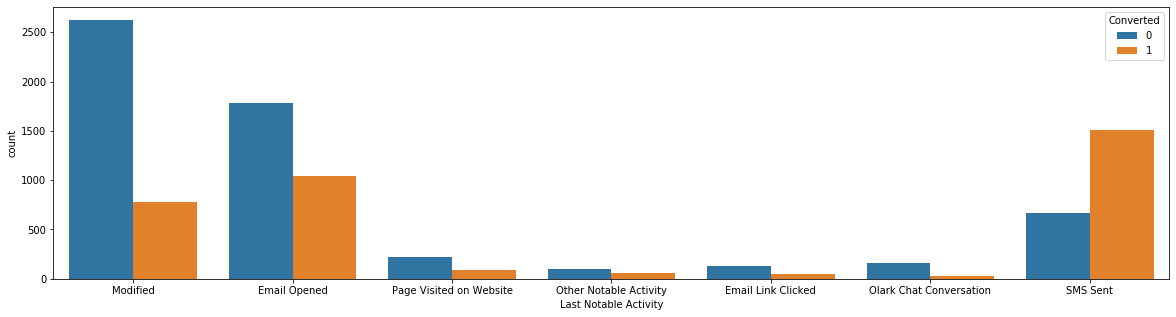

In [92]:
# plot to visualize the data for - Last Notable Activity Vs Converted -- Bivariate Analysis
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leadscore)
plt.show()

We can see Modifie and Email Opened has high leads but SMS sent has huge conversion percentage comparatively

In [93]:
# Dropping all the Categorical columns which are skewed based on above analysis
leadscore.drop(['Do Not Call',
       'Country',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [94]:
#To find the percentage of missing values in each columns in dataframe 
# after dropping skewed columns and cleaning categorical columns
round(100*(leadscore.isnull().sum())/(len(leadscore)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

### Continuous Column Analysis - Handling missing Values, Univariate & Bivariate Analysis, Outlier Treatment

In [95]:
# Handling TotalVisits Column
leadscore['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

As this is continuous column, we use median to impute the missing values

In [96]:
# To calculate the median for TotalVisits
leadscore['TotalVisits'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [97]:
# Handling TotalVisits missing value
leadscore['TotalVisits'].replace(np.nan,leadscore['TotalVisits'].median(),inplace = True )

##### Outlier/Univariate/Bivariate Analysis - for Totalvisists Column

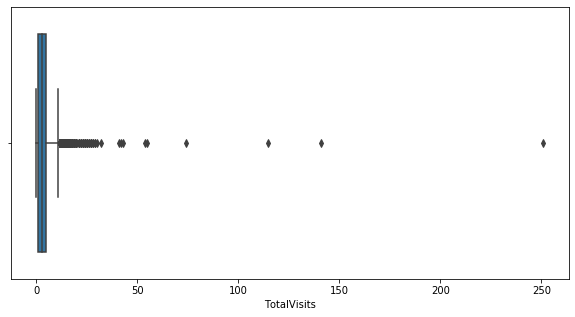

In [98]:
# Boxplot to visualize if any outliers - TotalVisits column -- Univariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot (x= 'TotalVisits', data = leadscore)
plt.show()

We can see clear outliers in the data. We will cap the data to 95% on upper level

In [99]:
#Outlier Treatment - TotalVisits column
q4 = leadscore['TotalVisits'].quantile(0.95)
leadscore['TotalVisits'][leadscore['TotalVisits']>=q4]=q4

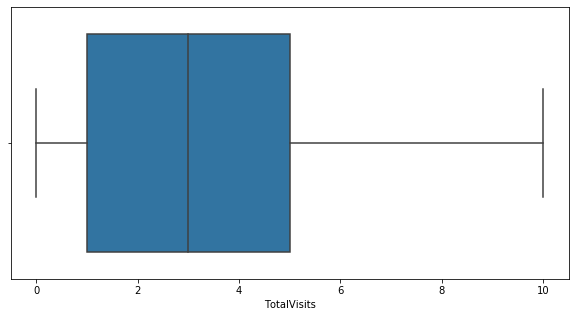

In [100]:
# Boxplot to visualize if any outliers - TotalVisits column -- Post Outlier Treatment
plt.figure(figsize = (10, 5))
sns.boxplot (x= 'TotalVisits', data = leadscore)
plt.show()

No Outliers in the boxplot now

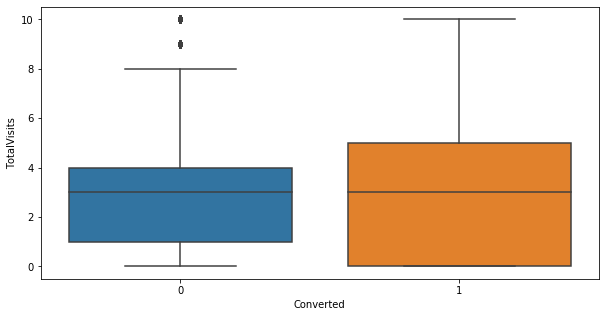

In [101]:
# To visualize boxplot for TotalVisits Vs Converted columns -- Bivariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot(y = 'TotalVisits', x= 'Converted', data = leadscore)
plt.show()

We can see that for converted we have more total visits

In [102]:
# Handling Page Views Per Visit Column
leadscore['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

As this is continuous column, we use mean to impute the missing values

In [103]:
# To calculate the mean for Page Views Per Visit
leadscore['Page Views Per Visit'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [104]:
# Handling Page Views Per Visit missing value
leadscore['Page Views Per Visit'].replace(np.nan,leadscore['Page Views Per Visit'].mean(),inplace = True )

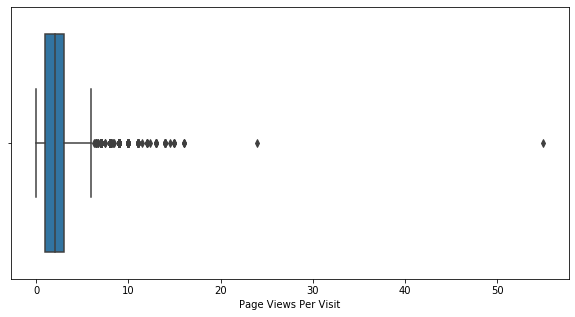

In [105]:
# Boxplot to visualize if any outliers - Page Views Per Visit column -- Univariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot (x= 'Page Views Per Visit', data = leadscore)
plt.show()

We can see clear outliers in the data. We will cap the data to 95% on upper level as we can see that data at 95% is 6 and 99% is 9 where as median is at 2

In [106]:
#Outlier Treatment - Page Views Per Visit column
q4 = leadscore['Page Views Per Visit'].quantile(0.95)
leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit']>=q4]=q4

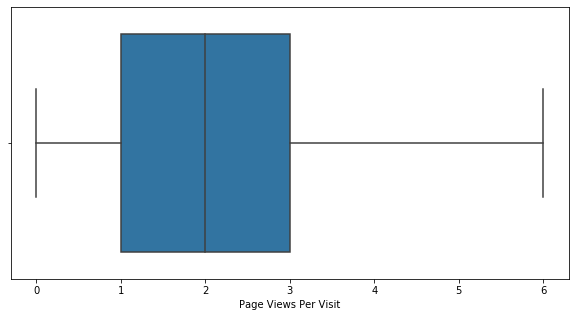

In [107]:
# Boxplot to visualize if any outliers - Page Views Per Visit column -- Post Outlier Treatment
plt.figure(figsize = (10, 5))
sns.boxplot (x= 'Page Views Per Visit', data = leadscore)
plt.show()

No Outliers in the boxplot now

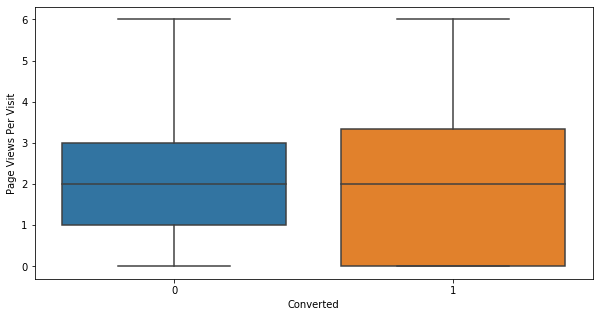

In [108]:
# To visualize boxplot for Page Views Per Visit Vs Converted columns -- Bivariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot(y = 'Page Views Per Visit', x= 'Converted', data = leadscore)
plt.show()

We can see that leads which are having more page views per visit have more conversions

In [109]:
# To calculate the mean for Total Time Spent on Website
leadscore['Total Time Spent on Website'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
1%          0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

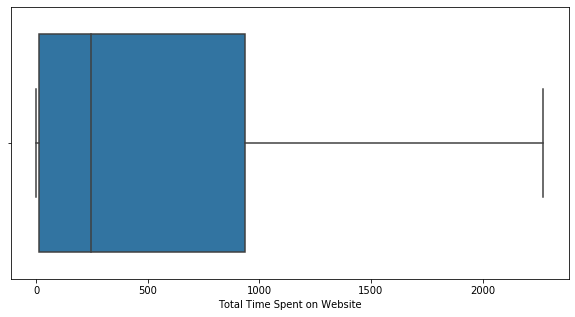

In [110]:
# Boxplot to visualize if any outliers - Total Time Spent on Website column -- Univariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot (x= 'Total Time Spent on Website', data = leadscore)
plt.show()

No Outliers in Total Time Spent on Website column

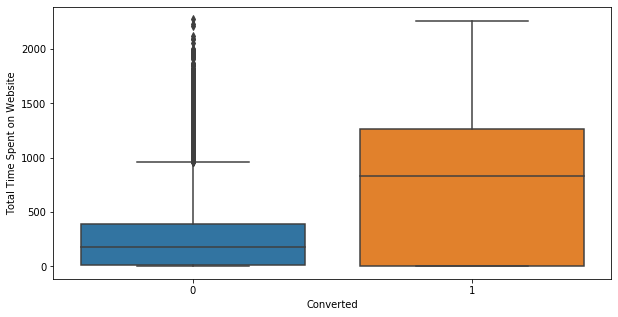

In [111]:
# To visualize boxplot for Total Time Spent on Website Vs Converted columns -- Bivariate Analysis
plt.figure(figsize = (10, 5))
sns.boxplot(y = 'Total Time Spent on Website', x= 'Converted', data = leadscore)
plt.show()

We can see that leads which are spending more time on website have more conversions

In [112]:
#To find the percentage of missing values in each columns in dataframe- after handling all data cleansing
round(100*(leadscore.isnull().sum())/(len(leadscore)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

We don't have any missing values in the datframe now

In [113]:
# To map A free copy of Mastering The Interview, Do Not Email column values to 1/0

# Define the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leadscore[['A free copy of Mastering The Interview']] = leadscore[['A free copy of Mastering The Interview']].apply(binary_map)
leadscore[['Do Not Email']] = leadscore[['Do Not Email']].apply(binary_map)

In [114]:
# Backing up the dataframe after all data cleansing
leadscore_bkp = leadscore.copy()
leadscore_bkp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [115]:
# dropping of unique ID column in dataframe --  Lead Number
leadscore.drop(['Lead Number'], axis = 1, inplace = True)

In [116]:
# To find correlation between columns in the dataframe
leadscore.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.135580,-0.000804,-0.046374,0.019600,0.055762
Converted,-0.135580,1.000000,0.045568,0.362483,-0.003149,-0.039820
TotalVisits,-0.000804,0.045568,1.000000,0.357773,0.767488,0.297519
Total Time Spent on Website,-0.046374,0.362483,0.357773,1.000000,0.362799,0.168298
Page Views Per Visit,0.019600,-0.003149,0.767488,0.362799,1.000000,0.297516
A free copy of Mastering The Interview,0.055762,-0.039820,0.297519,0.168298,0.297516,1.000000


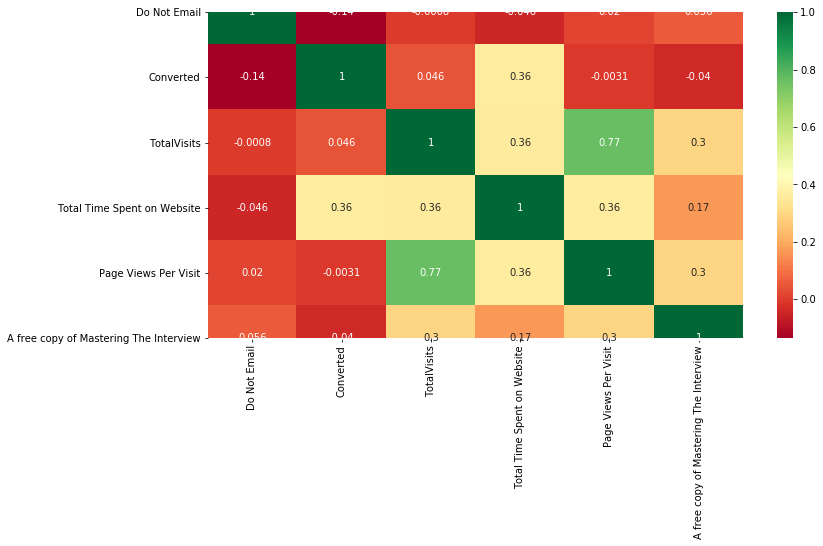

In [117]:
# Heat map based on correlation matrix
plt.figure(figsize = (12, 6))
sns.heatmap(leadscore.corr(), annot = True, cmap="RdYlGn")
plt.show()

We can see Total Visits is very highly correlated with Page views per visit

In [118]:
# Total Columns before dummy variable creation
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9240 non-null object
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Notable 

In [119]:
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


####  Dummy Variable Creation
We have Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation, Tags, City, Last Notable Activity   columns where we need to create dummy variables. All these columns have categorical data and have different levels.

In [120]:
# To create dummy variable for categorical variables and dropping the first one.
leadscore_dummy = pd.get_dummies(leadscore[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)

# concate the results to the master dataframe
leadscore = pd.concat([leadscore, leadscore_dummy], axis=1)

In [121]:
# Dummy variables creation for Lead Source
lead_dummy = pd.get_dummies(leadscore['Lead Source'], prefix = 'Lead Source')
lead_dummy = lead_dummy.drop(['Lead Source_Others'], axis = 1)
leadscore = pd.concat([leadscore, lead_dummy], axis=1)

In [122]:
# Dummy variables creation for  Last Activity,
last_dummy = pd.get_dummies(leadscore['Last Activity'], prefix = 'Last Activity')
last_dummy = last_dummy.drop(['Last Activity_Others'], axis = 1)
leadscore = pd.concat([leadscore, last_dummy], axis=1)

In [123]:
# Dummy variables creation for Specialization
spcl_dummy = pd.get_dummies(leadscore['Specialization'], prefix = 'Specialization')
spcl_dummy = spcl_dummy.drop(['Specialization_Not Specified'], axis = 1)
leadscore = pd.concat([leadscore, spcl_dummy], axis=1)

In [124]:
# Dummy variables creation for Tags
tags_dummy = pd.get_dummies(leadscore['Tags'], prefix = 'Tags')
tags_dummy = tags_dummy.drop(['Tags_Not Specified'], axis = 1)
leadscore = pd.concat([leadscore, tags_dummy], axis=1)

In [125]:
# Dummy variables creation for Last Notable Activity
notable_dummy = pd.get_dummies(leadscore['Last Notable Activity'], prefix = 'Last Notable Activity')
notable_dummy = notable_dummy.drop(['Last Notable Activity_Other Notable Activity'], axis = 1)
leadscore = pd.concat([leadscore, notable_dummy], axis=1)

In [126]:
# Dropping the variable where dummies are created
leadscore.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], axis = 1,inplace = True)

In [127]:
# Dataframe after creating dummies
leadscore.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [128]:
# Columns info after creating dummies
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
Prospect ID                                             9240 non-null object
Do Not Email                                            9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null float64
A free copy of Mastering The Interview                  9240 non-null int64
Lead Origin_Landing Page Submission                     9240 non-null uint8
Lead Origin_Lead Add Form                               9240 non-null uint8
Lead Origin_Lead Import                                 9240 non-null uint8
Lead Origin_Quick Add Form                              9240 non-null uint8
What is your current occupation_Housewife           

We can see all the variables are numeric except Prospect ID which is a unique identifier for this dataframe

### Logistic Regression Model Creation - Train & Test data split

In [129]:
# Backing up the dataframe before splitting
leadscore_bkp_before_model = leadscore.copy()
leadscore_bkp_before_model.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [130]:
# Data split between train and test 
from sklearn.model_selection import train_test_split

In [131]:
# Putting feature variable to X
X = leadscore.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [132]:
# Putting response variable to y
y = leadscore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [133]:
# Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the features

Scaling makes the variables to be comparable on the same scale. If we don't scale, some of the coefficients will be very large or very small and this will hamper the model evaluation. We have standardisation and min-max scaling techniques.

We will use Standardisation scaling for this assignment.

In [134]:
# importing scaling library
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-1.149699,-0.885371,-1.269958,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6795,0,0.299722,0.005716,-0.519633,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3516,0,0.662077,-0.691418,0.140427,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8105,0,0.662077,1.365219,1.550812,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3934,0,-1.149699,-0.885371,-1.269958,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [136]:
# Statistics for X_train
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,-6.206813e-17,-1.609377e-16,-2.183027e-16,0.311843,0.528139,0.079468,0.005102,0.000155,0.001391,...,0.034477,0.130952,0.221707,0.027984,0.018398,0.305349,0.367811,0.018553,0.035869,0.237477
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.071252,0.012434,0.037279,...,0.182466,0.337374,0.415427,0.164939,0.134397,0.460591,0.482247,0.134950,0.185978,0.425570
min,0.000000,-1.149699e+00,-8.853708e-01,-1.269958e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.873438e-01,-8.634138e-01,-7.058039e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-6.263344e-02,-4.352528e-01,-1.416499e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,6.620769e-01,8.098906e-01,4.225041e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,2.473853e+00,3.271816e+00,2.114966e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Lead Conversion Rate

In [137]:
### Checking the Conversion Rate
Conversion = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
Conversion

38.53896103896104

We have 38% of lead conversion

### Model Building

Running the First Training Model

### Model - 1

In [138]:
# importing libraries for stats model
import statsmodels.api as sm

In [139]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1218.1
Date:                Mon, 20 Jul 2020   Deviance:                       2436.2
Time:                        18:21:11   Pearson chi2:                 1.47e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7556      1.833     -1.503      0.133      -6.348       0.837
Do Not Email                                            -0.7644      0.300     -2.551      0.011      -1.352      -0.177
TotalVisits                                              0.3796      0.087      4.349      0.000       0.209       0.551
Total Time Spent on Website                              1.0518      0.062     16.845      0.000       0.929       1.174
Page Views Per Visit                                    -0.3232      0.099     -3.274      0.001      -0.517      -0.130
A free copy of Mastering The Interview                  -0.2881      0.179     -1.605      0.108      -0.640       0.064
Lead Origin_Landing Page Submission                     -0.6268      0.233     -2.686      0.007      -1.084      -0.169
Lead Origin_Lead Add Form                                1.4057      1.042      1.350      0.177      -0.636       3.447
Lead Origin_Lead Import                                  1.7476      1.849      0.945      0.344      -1.876       5.371
Lead Origin_Quick Add Form                              21.8031   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               22.5940   1.48e+04      0.002      0.999   -2.89e+04     2.9e+04
What is your current occupation_Other                    2.7381      3.064      0.894      0.372      -3.267       8.743
What is your current occupation_Student                  3.2385      1.718      1.885      0.059      -0.128       6.605
What is your current occupation_Unemployed               3.1017      1.606      1.931      0.053      -0.046       6.249
What is your current occupation_Working Professional     3.9068      1.636      2.389      0.017       0.701       7.112
City_Other Cities                                        0.2606      0.226      1.154      0.249      -0.182       0.703
City_Other Cities of Maharashtra                         0.1477      0.277      0.534      0.593      -0.395       0.690
City_Other Metro Cities                                  0.1605      0.306      0.525      0.600      -0.439       0.760
City_Thane & Outskirts                                   0.0064      0.238      0.027      0.979      -0.460       0.472
City_Tier II Cities                                      0.4454      0.637      0.699      0.485      -0.804       1.695
Lead Source_Direct Traffic                              -0.8386      0.828     -1.013      0.311      -2.461       0.783
Lead Source_Facebook                                    -2.9632      1.844     -1.607      0.108      -6.578       0.651
Lead Source_Google                                      -0

We have lot of variables which are insignificant, so we will go with coarse feature selection using RFE and fine tuning the features based on manual approach

In [140]:
# importing libraries for RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [141]:
# To run RFE to get 15 output variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [142]:
# validate RFE results
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False])

In [143]:
# To get RFE output which gives all the columns in dataset with their ranking and support value with True/False for filtering
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 33),
 ('What is your current occupation_Housewife', False, 24),
 ('What is your current occupation_Other', False, 46),
 ('What is your current occupation_Student', False, 40),
 ('What is your current occupation_Unemployed', False, 41),
 ('What is your current occupation_Working Professional', False, 5),
 ('City_Other Cities', False, 37),
 ('City_Other Cities of Maharashtra', False, 50),
 ('City_Other Metro Cities', False, 43),
 ('City_Thane & Outskirts', False, 53),
 ('City_Tier II Cities', False, 36),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 14),
 ('L

In [144]:
# To get the list of columns which are required for further modelling where rfe.support is True/rfe.ranking =1
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [145]:
# List of columns which are ignored by the RFE in feature selection step
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Ema

### Model Building using Statsmodel
From initial 71 features, through automated RFE approach we bought them to 15 features. Now to identify the best model fit we will do manual approach through statsmodel and filter unnecessary features

### Model - 2

In [146]:
# Logistic Regression Model with RFE selected features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.3
Date:                Mon, 20 Jul 2020   Deviance:                       2914.7
Time:                        18:21:13   Pearson chi2:                 1.49e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2119      0.074    -16.329      0.000      -1.357      -1.066
Lead Source_Welingak Website                      4.6814      0.750      6.239      0.000       3.211       6.152
Last Activity_SMS Sent                            2.0431      0.106     19.272      0.000       1.835       2.251
Tags_Already a student                           -3.3305      0.713     -4.669      0.000      -4.729      -1.932
Tags_Closed by Horizzon                           7.9821      1.008      7.917      0.000       6.006       9.958
Tags_Interested  in full time MBA                -1.7985      0.725     -2.481      0.013      -3.219      -0.377
Tags_Interested in other courses                 -1.5682      0.325     -4.826      0.000      -2.205      -0.931
Tags_Lost to EINS                                 6.4026      0.724      8.842      0.000       4.983       7.822
Tags_Not doing further education                 -2.9176      1.019     -2.862      0.004      -4.916      -0.920
Tags_Other Tags                                  -1.7741      0.267     -6.641      0.000      -2.298      -1.250
Tags_Ringing                                     -3.3704      0.221    -15.277      0.000      -3.803      -2.938
Tags_Will revert after reading the email          4.7330      0.174     27.259      0.000       4.393       5.073
Tags_switched off                                -3.8328      0.517     -7.407      0.000      -4.847      -2.819
Last Notable Activity_Email Link Clicked         -1.4188      0.459     -3.091      0.002      -2.318      -0.519
Last Notable Activity_Modified                   -1.7910      0.116    -15.445      0.000      -2.018      -1.564
Last Notable Activity_Olark Chat Conversation    -1.2622      0.393     -3.208      0.001      -2.033      -0.491
=================================================================================================================
"""

We can see the p-value for all the features is far less than 0.05, so there are no features which are not significant

In [147]:
# lets predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.010128
6795    0.229370
3516    0.010128
8105    0.073156
3934    0.047296
4844    0.996182
3297    0.010128
8071    0.993167
987     0.047296
7423    0.996182
dtype: float64

In [148]:
# probabilities of prediction on trained dataset
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0101281 , 0.22936987, 0.0101281 , 0.07315634, 0.04729644,
       0.99618196, 0.0101281 , 0.9931675 , 0.04729644, 0.99618196])

We got the predicted probabilities on the train data set based on our model, now we will compare this with actual values

In [149]:
# To create a dataframe with actual converted and predicted converted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.010128,1871
1,0,0.229370,6795
2,0,0.010128,3516
3,0,0.073156,8105
4,0,0.047296,3934


##### To start off, we will populate a new column - Predicted by considering the lead is converted if converted_Prob > 0.5  else 0

In [150]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.010128,1871,0
1,0,0.229370,6795,0
2,0,0.010128,3516,0
3,0,0.073156,8105,0
4,0,0.047296,3934,0


In [151]:
# Import libraries to calculate Confusion Matrix and Accuracy
from sklearn import metrics

In [152]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3850  152]
 [ 346 2120]]


In [153]:
# Analysis of Confusion Matrix
# Predicted     not_converted    Converted
# Actual
# not_converted        3850      152
# Converted            346       2120  

In [154]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9230055658627088


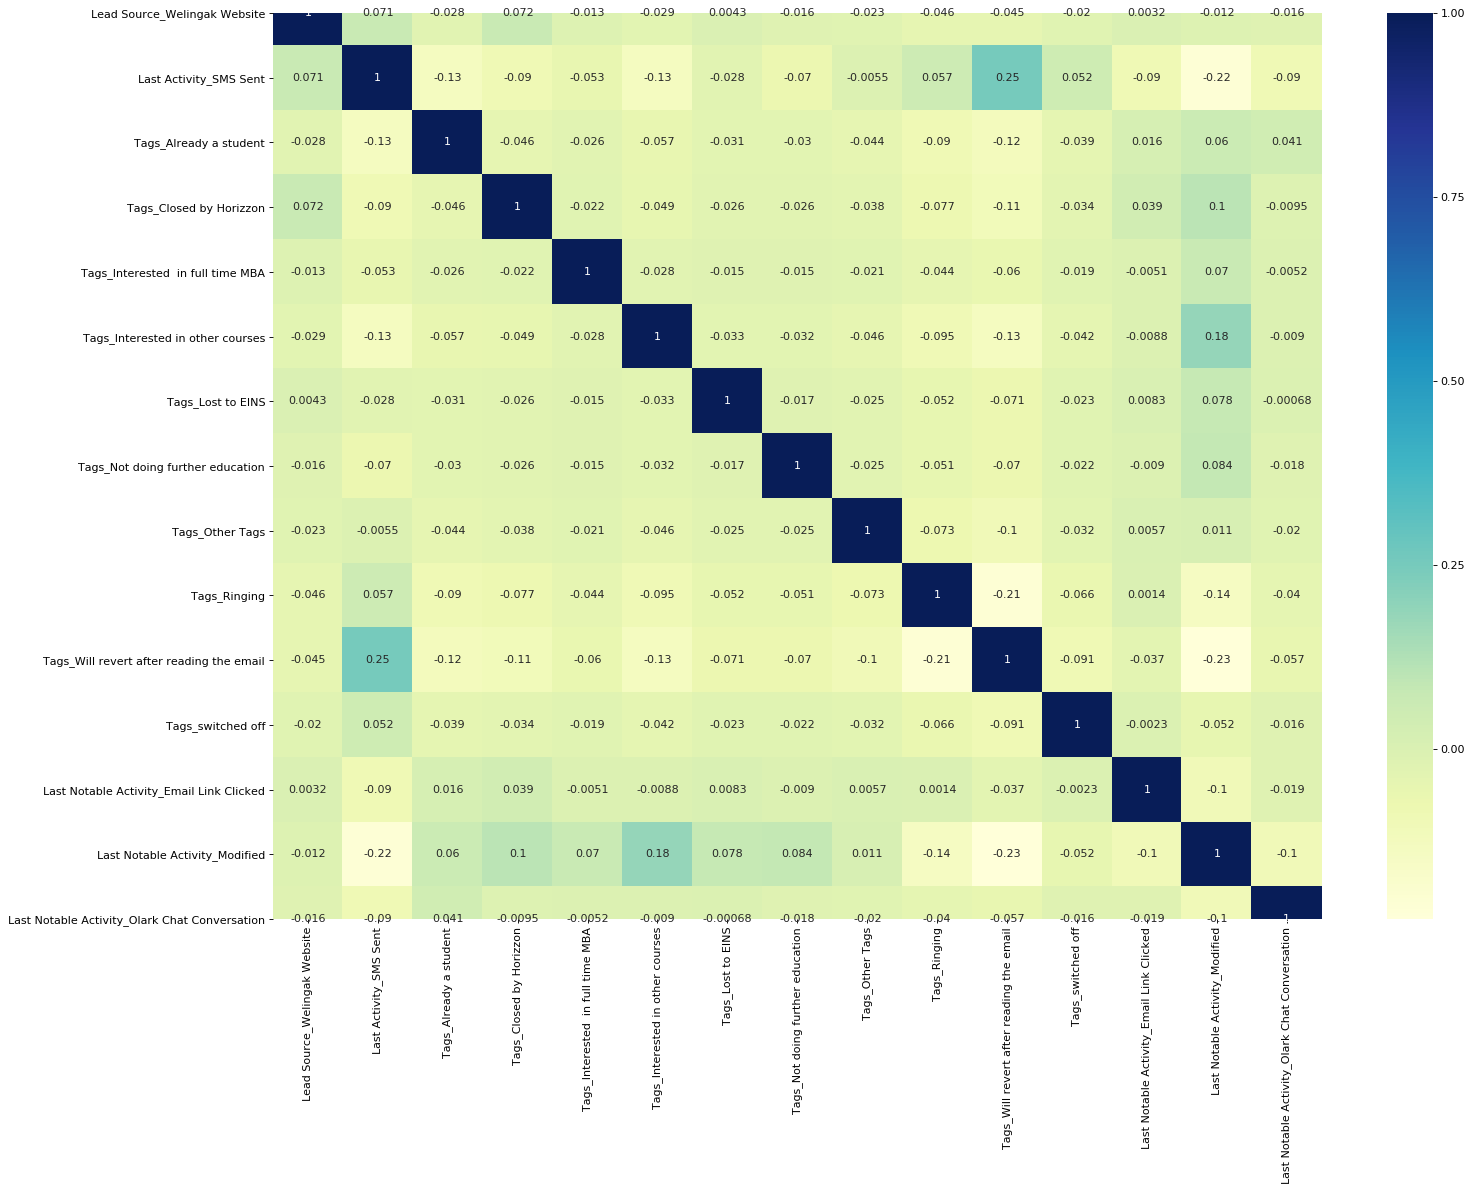

In [155]:
# Validating if any variables are collinear in the dataframe
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

We didn't see any correlation between the variables of the trained data set

We have 92.3% Accuracy with our model, which is very good. But we are totally dependent on p-value for this model. But we know some times multicollinearity may exists between the features and this may impact the overall model.
So let's calculate VIF to find the multicollinearity in the features

We will calculate Variance Inflation Factor (VIF) in next steps. Based on p-value & VIF we will proceed further in feature selection

In [156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.07
0,Lead Source_Welingak Website,1.03
6,Tags_Lost to EINS,1.03
7,Tags_Not doing further education,1.03
8,Tags_Other Tags,1.03
11,Tags_switched off,1.03
4,Tags_Interested in full time MBA,1.02
12,Last Notable Activity_Email Link Clicked,1.02
14,Last Notable Activity_Olark Chat Conversation,1.01
5,Tags_Interested in other courses,0.34


The VIF also is very low and this says there is not much multicollinearity between the variables. But from the p-values we have Tags_Interested in full time MBA with 0.013 which is low but higher comparable to other features. So lets try dropping this variable and see if any changes in the model

### Model - 3

In [158]:
#To drop the column - Tags_Interested  in full time MBA
col = col.drop('Tags_Interested  in full time MBA', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [159]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1462.8
Date:                Mon, 20 Jul 2020   Deviance:                       2925.6
Time:                        18:21:15   Pearson chi2:                 1.53e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2389      0.074    -16.771      0.000      -1.384      -1.094
Lead Source_Welingak Website                      4.7169      0.751      6.281      0.000       3.245       6.189
Last Activity_SMS Sent                            2.0626      0.106     19.490      0.000       1.855       2.270
Tags_Already a student                           -3.3011      0.713     -4.628      0.000      -4.699      -1.903
Tags_Closed by Horizzon                           8.0254      1.008      7.960      0.000       6.049      10.002
Tags_Interested in other courses                 -1.5395      0.325     -4.734      0.000      -2.177      -0.902
Tags_Lost to EINS                                 6.4454      0.724      8.900      0.000       5.026       7.865
Tags_Not doing further education                 -2.8907      1.020     -2.835      0.005      -4.889      -0.892
Tags_Other Tags                                  -1.7589      0.267     -6.576      0.000      -2.283      -1.235
Tags_Ringing                                     -3.3589      0.221    -15.221      0.000      -3.791      -2.926
Tags_Will revert after reading the email          4.7688      0.174     27.450      0.000       4.428       5.109
Tags_switched off                                -3.8226      0.518     -7.386      0.000      -4.837      -2.808
Last Notable Activity_Email Link Clicked         -1.4148      0.460     -3.074      0.002      -2.317      -0.513
Last Notable Activity_Modified                   -1.8110      0.116    -15.647      0.000      -2.038      -1.584
Last Notable Activity_Olark Chat Conversation    -1.2484      0.394     -3.169      0.002      -2.020      -0.476
=================================================================================================================
"""

We can see the p-value for all the features is far less than 0.05, so there all features are of significant

In [160]:
# lets predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009973
6795    0.224630
3516    0.009973
8105    0.073423
3934    0.045223
4844    0.996288
3297    0.009973
8071    0.993143
987     0.045223
7423    0.996288
dtype: float64

In [161]:
# probabilities of prediction on trained dataset
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00997326, 0.22462974, 0.00997326, 0.07342305, 0.04522271,
       0.99628786, 0.00997326, 0.99314257, 0.04522271, 0.99628786])

We got the predicted probabilities on the train data set based on our model, now we will compare this with actual values

In [162]:
# To create a dataframe with actual converted and predicted converted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.009973,1871
1,0,0.224630,6795
2,0,0.009973,3516
3,0,0.073423,8105
4,0,0.045223,3934


We will populate a new column - Predicted by considering the lead is converted if converted_Prob > 0.5 else 0

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.009973,1871,0
1,0,0.224630,6795,0
2,0,0.009973,3516,0
3,0,0.073423,8105,0
4,0,0.045223,3934,0


In [164]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3850  152]
 [ 346 2120]]


In [165]:
# Analysis of Confusion Matrix
# Predicted     not_converted    Converted
# Actual
# not_converted        3850      152
# Converted            346       2120  

In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9230055658627088


After removing "Tags_Interested  in full time MBA" feature also, we have 92.3% Accuracy with our model, which is very good. Also the values in confusion matrix also doesn't change much.

So let's calculate VIF to find the multicollinearity in the features after dropping a column.

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.07
0,Lead Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
6,Tags_Not doing further education,1.03
7,Tags_Other Tags,1.03
10,Tags_switched off,1.03
11,Last Notable Activity_Email Link Clicked,1.02
13,Last Notable Activity_Olark Chat Conversation,1.01
4,Tags_Interested in other courses,0.34
2,Tags_Already a student,0.23


We can see that the VIF also is very low and this says there is not much multicollinearity between the variables. 
So we can go with this model having 14 features. But as we have lot of features in our model, lets see by dropping one more feature and see if it impacts the model.

From the p-values we have  Tags_Not doing further education with 0.005 which is very low but higher comparable to other features. So lets try dropping this variable and see if any changes in the model

### Model - 4

In [168]:
#To drop the column - Tags_Not doing further education
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [169]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1473.7
Date:                Mon, 20 Jul 2020   Deviance:                       2947.4
Time:                        18:21:15   Pearson chi2:                 1.58e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2819      0.074    -17.436      0.000      -1.426      -1.138
Lead Source_Welingak Website                      4.7640      0.752      6.339      0.000       3.291       6.237
Last Activity_SMS Sent                            2.0911      0.106     19.809      0.000       1.884       2.298
Tags_Already a student                           -3.2581      0.713     -4.568      0.000      -4.656      -1.860
Tags_Closed by Horizzon                           8.0804      1.008      8.014      0.000       6.104      10.057
Tags_Interested in other courses                 -1.4990      0.326     -4.604      0.000      -2.137      -0.861
Tags_Lost to EINS                                 6.4995      0.724      8.975      0.000       5.080       7.919
Tags_Other Tags                                  -1.7348      0.268     -6.476      0.000      -2.260      -1.210
Tags_Ringing                                     -3.3392      0.221    -15.127      0.000      -3.772      -2.907
Tags_Will revert after reading the email          4.8169      0.174     27.716      0.000       4.476       5.158
Tags_switched off                                -3.8046      0.518     -7.351      0.000      -4.819      -2.790
Last Notable Activity_Email Link Clicked         -1.4003      0.462     -3.029      0.002      -2.306      -0.494
Last Notable Activity_Modified                   -1.8269      0.115    -15.836      0.000      -2.053      -1.601
Last Notable Activity_Olark Chat Conversation    -1.2103      0.395     -3.064      0.002      -1.984      -0.436
=================================================================================================================
"""

We can see the p-value for all the features is far less than 0.05, so there all features are of significant

In [170]:
# lets predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009746
6795    0.217229
3516    0.009746
8105    0.073782
3934    0.042745
4844    0.996410
3297    0.009746
8071    0.993116
987     0.042745
7423    0.996410
dtype: float64

In [171]:
# probabilities of prediction on trained dataset
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0097465 , 0.21722949, 0.0097465 , 0.07378155, 0.04274524,
       0.99641026, 0.0097465 , 0.9931158 , 0.04274524, 0.99641026])

In [172]:
# To create a dataframe with actual converted and predicted converted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.009746,1871
1,0,0.217229,6795
2,0,0.009746,3516
3,0,0.073782,8105
4,0,0.042745,3934


In [173]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.009746,1871,0
1,0,0.217229,6795,0
2,0,0.009746,3516,0
3,0,0.073782,8105,0
4,0,0.042745,3934,0


In [174]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3848  154]
 [ 346 2120]]


In [175]:
# Analysis of Confusion Matrix
# Predicted     not_converted    Converted
# Actual
# not_converted        3848      154
# Converted            346       2120 

In [176]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9226963512677798


After removing "Tags_Not doing further education" feature also, we have 92.26% Accuracy with our model, which is very good. Also the values in confusion matrix also doesn't change much.
So let's calculate VIF to find the multicollinearity in the features after dropping a column.

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.06
0,Lead Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
6,Tags_Other Tags,1.03
9,Tags_switched off,1.03
10,Last Notable Activity_Email Link Clicked,1.02
12,Last Notable Activity_Olark Chat Conversation,1.01
4,Tags_Interested in other courses,0.34
2,Tags_Already a student,0.23
8,Tags_Will revert after reading the email,0.14


We can see that the VIF also is very low and this says there is not much multicollinearity between the variables. So we can go with this model having 13 features

## Final Model Observations

All the features in the model has p-value < 0.05
<br>
All the features have very low VIF values, i.e. there is hardly any multicollinearity between the features
<br>
The Overall accuracy of the model is 92.26% which is very good
<br>

#### Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Will revert after reading the email -- These are the top 3 features which contribute most towards the probability of lead getting generated

#### So we will go ahead with this model for further metric analysis and making predictions

### Other Metrics - Sensitivity, Specificity, True Postive Rate, False Negative Rate

In [178]:
# To define True Positive, True Negative, False Positive, False Negative based on Confusion Matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Calculate the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8596918085969181

In [180]:
# Calculate the Specificity of our logistic regression model
TN / float(TN+FP)

0.9615192403798101

In [181]:
# Calculate False Postive Rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0384807596201899


In [182]:
# positive predictive value 
print (TP / float(TP+FP))

0.9322779243623571


In [183]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9175011921793038


### Plotting the ROC Curve

Receiver Operating Charateristics (ROC) curve is plotted between Sensitivity and Specificity. The curve must touch at (0,1) for a perfect model. But it will be good if it is nearer to the top left corner and the area under ROC curve must be maximum for good model

In [184]:
# Define ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [185]:
# Assign the values
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

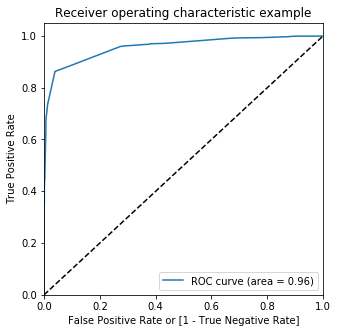

In [186]:
# Plot the curev
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under ROC curve should be equal to 1 for a perfect model.In our final model, we are getting area under ROC curve to 0.96 which is very good predictive model
<br>

#### Area Under ROC Curve = 0.96

### To Find Optimal Cutoff Point

Till now for all above analysis we have chose an arbitary cut-off value of 0.5. But we need to determine which will be te optimal cutoff point for the model

In [187]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009746,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.217229,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.009746,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.073782,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.042745,3934,0,1,0,0,0,0,0,0,0,0,0


In [188]:
# To calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.814935  0.959448  0.725887
0.2   0.2  0.814935  0.959448  0.725887
0.3   0.3  0.923624  0.862530  0.961269
0.4   0.4  0.922696  0.859692  0.961519
0.5   0.5  0.922696  0.859692  0.961519
0.6   0.6  0.922696  0.859692  0.961519
0.7   0.7  0.891156  0.734793  0.987506
0.8   0.8  0.891156  0.734793  0.987506
0.9   0.9  0.870284  0.670316  0.993503


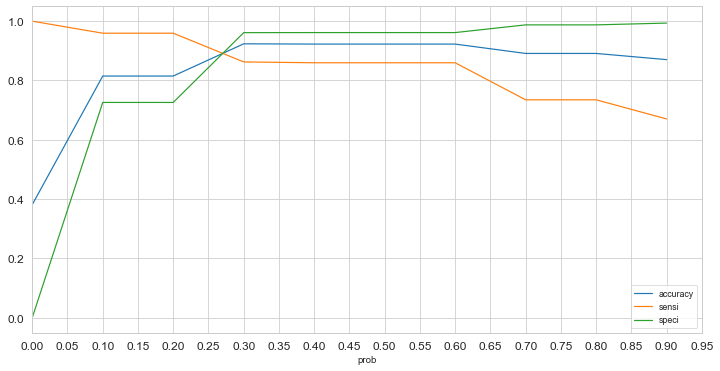

In [189]:
# To plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(12,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

### From the above curve we can consider 0.28 is the optimum point to take it as a cutoff probability.

In [190]:
# To calculate the predicted values on train dataset based on optimal cut off - 0.28
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009746,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.217229,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.009746,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.073782,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.042745,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [191]:
# To calculate the overall accuracy based on final predicted values
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9192949907235621

After changing the optimal cutoff also, the accuracy doesn't drop and it holds to 92%

In [192]:
# To calculate confusion matrix based on final predicted
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3809,  193],
       [ 329, 2137]])

In [193]:
# Analysis of Confusion Matrix
# Predicted     not_converted    Converted
# Actual
# not_converted        3809      193
# Converted            329       2137

The values in confusion matrix also doesn't changed much if we change cutoff to optimal value. Only few values changed

In [194]:
# To define True Positive, True Negative, False Positive, False Negative based on Confusion Matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Calculate the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8665855636658556

In [196]:
# Calculate the Specificity of our logistic regression model
TN / float(TN+FP)

0.9517741129435282

In [197]:
# Calculate False Postive Rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04822588705647177


In [198]:
# positive predictive value 
print (TP / float(TP+FP))

0.917167381974249


In [199]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9204929917834703


### Precision & Recall

In [200]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3809,  193],
       [ 329, 2137]])

In [201]:
# Precision (TP / float(TP+ FP))
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.917167381974249

In [202]:
# Recall print (TP / float(TP+ FN))
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8665855636658556

In [203]:
# calculate precision & recall through sklearn library
from sklearn.metrics import precision_score, recall_score

In [204]:
#Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.917167381974249

In [205]:
#Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8665855636658556

In [206]:
# To plot precision Recall curve
from sklearn.metrics import precision_recall_curve

In [207]:
# To view the variables
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [208]:
# To define the values
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

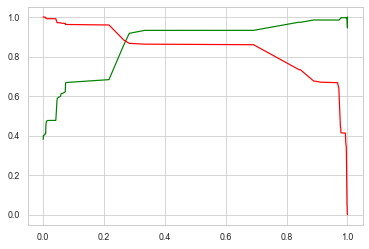

In [209]:
# Plot the Precision Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Observations Train Data

We have area under ROC curve - 0.97
<br>
Accuracy - 92%
<br>
Sensitivity - 86.7%
<br>
Specificity - 95.1%
<br>
False Positive Rate - 4.82%
<br>
Positive Predictive Value - 91.7%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.7%
<br>
Recall - 86.7%


### Predictions on Test data set

In [210]:
# Scale the Test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [211]:
# Test data check
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1,0,0,0,0,0,0,0,0,0,0,0
2376,0,1,0,0,0,0,0,0,1,0,0,0,0
7766,0,0,0,0,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,0,0,0,0,0,0,0,0,1,0,0,0,0


In [212]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [213]:
# Making predictions on Test dataset
y_test_pred = res.predict(X_test_sm)

In [214]:
# Check the predicted data
y_test_pred[:10]

4269    0.691932
2376    0.996410
7766    0.971668
9199    0.001715
4359    0.971668
9186    0.996410
1631    0.971668
8963    0.971668
8007    0.042745
5324    0.996410
dtype: float64

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [216]:
# Let's see the head
y_pred_1.head()

,0
4269,0.691932
2376,0.996410
7766,0.971668
9199,0.001715
4359,0.971668


In [217]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [218]:
# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [219]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [220]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [221]:
# To view the dataframe
y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.691932
1,1,2376,0.996410
2,1,7766,0.971668
3,0,9199,0.001715
4,1,4359,0.971668


In [222]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [223]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead ID','Converted','Converted_Prob']]

In [224]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,4269,1,0.691932
1,2376,1,0.996410
2,7766,1,0.971668
3,9199,0,0.001715
4,4359,1,0.971668


In [225]:
# Let's see the shape of y_pred_final
y_pred_final.shape

(2772, 3)

In [226]:
# Final predicted based on 0.28 optimal value
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [227]:
# To see the data
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.691932,1
1,2376,1,0.996410,1
2,7766,1,0.971668,1
3,9199,0,0.001715,0
4,4359,1,0.971668,1


In [228]:
# To check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9199134199134199

We are getting an accuracy of 92% which is almost equal to the train dataset

In [229]:
# To check the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1586,   91],
       [ 131,  964]])

In [230]:
# To define True Positive, True Negative, False Positive, False Negative based on Confusion Matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [231]:
# Calculate the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8803652968036529

In [232]:
# Calculate the Specificity of our logistic regression model
TN / float(TN+FP)

0.9457364341085271

In [233]:
# Calculate False Postive Rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05426356589147287


In [234]:
# positive predictive value 
print (TP / float(TP+FP))

0.9137440758293839


In [235]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9237041351193943


In [236]:
#Precision Score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9137440758293839

In [237]:
#Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8803652968036529

### Observations Test Data

<br>
Accuracy - 92%
<br>
Sensitivity - 88%
<br>
Specificity - 94.6%
<br>
False Positive Rate - 5.42%
<br>
Positive Predictive Value - 91.3%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.4%
<br>
Recall - 88%



### Plotting ROC Curve on Test Data

In [238]:
# Define ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [239]:
# Assign the values
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

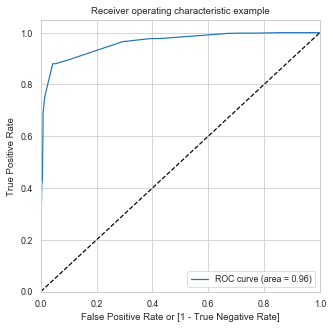

In [240]:
# Plot the curev
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

#### Area Under ROC Curve for Test data = 0.96, This shows our model is doing pretty well on Test data

### Final Observations

### Observations Train Data

Area under ROC curve - 0.97
<br>
Accuracy - 92%
<br>
Sensitivity - 86.7%
<br>
Specificity - 95.1%
<br>
False Positive Rate - 4.82%
<br>
Positive Predictive Value - 91.7%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.7%
<br>
Recall - 86.7%



### Observations Test Data

Area under ROC curve - 0.96
<br>
Accuracy - 92%
<br>
Sensitivity - 88%
<br>
Specificity - 94.6%
<br>
False Positive Rate - 5.42%
<br>
Positive Predictive Value - 91.3%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.4%
<br>
Recall - 88%

### Calculate Leadscore for entire dataset

#### Lead Score = 100*Converted_Probability
<br>
We will calculate this Leadscore for all the dataset (both train & test)

In [241]:
# Get copy of final test predicted dataset
leadscore_test_pred = y_pred_final.copy()
leadscore_test_pred.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.691932,1
1,2376,1,0.996410,1
2,7766,1,0.971668,1
3,9199,0,0.001715,0
4,4359,1,0.971668,1


In [242]:
# To check the shape of test dataset
leadscore_test_pred.shape

(2772, 4)

In [243]:
# Get copy of final train predicted dataset
leadscore_train_pred = y_train_pred_final.copy()
leadscore_train_pred.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009746,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.217229,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.009746,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.073782,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.042745,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [244]:
# Get required columns from final train predicted dataset
leadscore_train_pred = leadscore_train_pred[['Lead ID','Converted','Converted_Prob','final_predicted']]
leadscore_train_pred.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,1871,0,0.009746,0
1,6795,0,0.217229,0
2,3516,0,0.009746,0
3,8105,0,0.073782,0
4,3934,0,0.042745,0


In [245]:
# To check the shape of train dataset
leadscore_train_pred.shape

(6468, 4)

In [246]:
# Concatenate both datasets along with rows into 1 consolidated leadscore predicted dataset
leadscore_combined_pred = leadscore_train_pred.append(leadscore_test_pred)
leadscore_combined_pred.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,1871,0,0.009746,0
1,6795,0,0.217229,0
2,3516,0,0.009746,0
3,8105,0,0.073782,0
4,3934,0,0.042745,0


In [247]:
# To check the shape of combined dataset
leadscore_combined_pred.shape

(9240, 4)

In [248]:
# Check for any duplicate records in the combined dataset -- Lead ID
sum(leadscore_combined_pred.duplicated(subset = 'Lead ID')) == 0

True

There are no records in the dataframe

In [249]:
# To calculate the Lead Score value
# Lead Score = 100 * Conversion_Prob
leadscore_combined_pred['Lead Score'] = leadscore_combined_pred['Converted_Prob'].apply(lambda x : round(x*100))
leadscore_combined_pred.head()

,Lead ID,Converted,Converted_Prob,final_predicted,Lead Score
0,1871,0,0.009746,0,1
1,6795,0,0.217229,0,22
2,3516,0,0.009746,0,1
3,8105,0,0.073782,0,7
4,3934,0,0.042745,0,4


In [250]:
# To Make Lead ID as Index
leadscore_combined_pred = leadscore_combined_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
leadscore_combined_pred.head()

,Converted,Converted_Prob,final_predicted,Lead Score
Lead ID,,,,
0,0,0.009875,0,1
1,0,0.009746,0,1
2,1,0.971668,1,97
3,0,0.001581,0,0
4,1,0.846590,1,85


Now we join this final predicted dataframe to source data frame. This is to make sure that each lead number must have a lead score which helps sales team for further follow up

In [251]:
# Taking the copy of the dataframe before Train/Test split and extracting the unique Lead Number details
leadscore_uniqueID = leadscore_bkp[['Lead Number']]
leadscore_uniqueID.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [252]:
# To append the lead number to leadscore dataframe 
leads_df_with_leadscore = pd.concat([leadscore_uniqueID,leadscore_combined_pred], axis = 1)
leads_df_with_leadscore.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,660737,0,0.009875,0,1
1,660728,0,0.009746,0,1
2,660727,1,0.971668,1,97
3,660719,0,0.001581,0,0
4,660681,1,0.846590,1,85


In [253]:
# To inspect the shape of final dataframe to make sure we have all records
leads_df_with_leadscore.shape

(9240, 5)

#### We have the final leads_df_with_leadscore dataframe with Lead score value populated for all the records.

### Final Conclusions

All the features in the model has p-value < 0.05
<br>
All the features have very low VIF values, i.e. there is hardly any multicollinearity between the features
<br>
The Overall accuracy of the model is 92.26% which is very good
<br>

#### Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Will revert after reading the email -- These are the top 3 features which contribute most towards the probability of lead getting generated

#### Observations Train Data

Area under ROC curve - 0.97
<br>
Accuracy - 92%
<br>
Sensitivity - 86.7%
<br>
Specificity - 95.1%
<br>
False Positive Rate - 4.82%
<br>
Positive Predictive Value - 91.7%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.7%
<br>
Recall - 86.7%


#### Observations Test Data

Area under ROC curve - 0.96
<br>
Accuracy - 92%
<br>
Sensitivity - 88%
<br>
Specificity - 94.6%
<br>
False Positive Rate - 5.42%
<br>
Positive Predictive Value - 91.3%
<br>
Negative Predictive Value - 92%
<br>
Precision - 91.4%
<br>
Recall - 88%

#### Features where conversion probability of a lead increases with increase in values (+Ve Coefficients)

Tags_Closed by Horizzon
<br>
Tags_Lost to EINS
<br>
Tags_Will revert after reading the email
<br>
Lead Source_Welingak Website
<br>
Last Activity_SMS Sent
<br>

#### Features where conversion probability of a lead increases with decrease in values (-Ve Coefficients)

Last Notable Activity_Olark Chat Conversation
<br>
Last Notable Activity_Email Link Clicked
<br>
Tags_Interested in other courses
<br>
Tags_Other Tags
<br>
Last Notable Activity_Modified
<br>
Tags_Already a student
<br>
Tags_Ringing
<br>
Tags_switched off